In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mtdlearn.mtd import MTD
from mtdlearn.preprocessing import PathEncoder
from mtdlearn.datasets import data_values3_order2_full

import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
x = data_values3_order2_full['x']
y = data_values3_order2_full['y']
sample_weight = data_values3_order2_full['sample_weight']

In [5]:
x

array([['A>A>A'],
       ['A>A>B'],
       ['A>A>C'],
       ['A>B>A'],
       ['A>B>A'],
       ['A>B>A'],
       ['A>B>B'],
       ['A>B>B'],
       ['A>B>B'],
       ['A>B>C'],
       ['A>B>C'],
       ['A>B>C'],
       ['A>C>A'],
       ['A>C>A'],
       ['A>C>A'],
       ['A>C>B'],
       ['A>C>B'],
       ['A>C>B'],
       ['A>C>C'],
       ['A>C>C'],
       ['A>C>C'],
       ['B>A>A'],
       ['B>A>A'],
       ['B>A>A'],
       ['B>A>B'],
       ['B>A>B'],
       ['B>A>B'],
       ['B>A>C'],
       ['B>A>C'],
       ['B>A>C'],
       ['B>B>A'],
       ['B>B>A'],
       ['B>B>A'],
       ['B>B>B'],
       ['B>B>B'],
       ['B>B>B'],
       ['B>B>C'],
       ['B>B>C'],
       ['B>B>C'],
       ['B>C>A'],
       ['B>C>A'],
       ['B>C>A'],
       ['B>C>B'],
       ['B>C>B'],
       ['B>C>B'],
       ['B>C>C'],
       ['B>C>C'],
       ['B>C>C'],
       ['C>A>A'],
       ['C>A>A'],
       ['C>A>A'],
       ['C>A>B'],
       ['C>A>B'],
       ['C>A>B'],
       ['C>A>C'],
       ['C

In [3]:
x[:5]

array([['A>A>A'],
       ['A>A>B'],
       ['A>A>C'],
       ['A>B>A'],
       ['A>B>A']], dtype='<U5')

In [27]:
y[:5]

array(['A', 'A', 'A', 'A', 'B'], dtype='<U1')

In [28]:
sample_weight[:5]

array([1000, 1000, 1000,  100,  100])

## Encode paths

In [29]:
pe = PathEncoder(3)
pe.fit(x, y)

PathEncoder(order=3, r_just_string='null', sep='>')

In [30]:
pe.label_dict

{'A': 0, 'B': 1, 'C': 2, 'null': 3}

In [8]:
x_tr3, y_tr3 = pe.transform(x, y)

In [9]:
x_tr3[:5]

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       [0, 1, 0],
       [0, 1, 0]])

In [10]:
y_tr3[:5]

array([0, 0, 0, 0, 1])

## Fitting model

In [31]:
model = MTD(n_dimensions=3, order=3)

In [32]:
model.fit(x_tr3, y_tr3)

best value: -81.85092905482018


## Information criteria

In [130]:
model.aic

191.70185810964037

In [33]:
model.bic

224.1466916991487

## Trained parameters

In [50]:
model.lambdas.round(3)

array([0.329, 0.564, 0.107])

In [51]:
model.transition_matrices.round(3)

array([[[0.468, 0.276, 0.257],
        [0.254, 0.326, 0.421],
        [0.305, 0.318, 0.377]],

       [[0.443, 0.315, 0.241],
        [0.372, 0.357, 0.271],
        [0.357, 0.348, 0.296]],

       [[0.176, 0.163, 0.662],
        [0.398, 0.224, 0.378],
        [0.325, 0.293, 0.382]]])

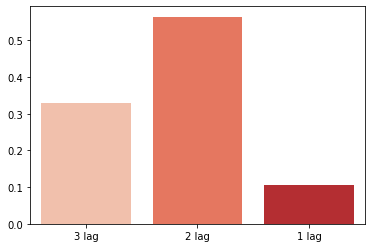

In [137]:
sns.barplot(x=[f'{abs(i-3)} lag' for i in range(model.order)], y=model.lambdas, palette='Reds');

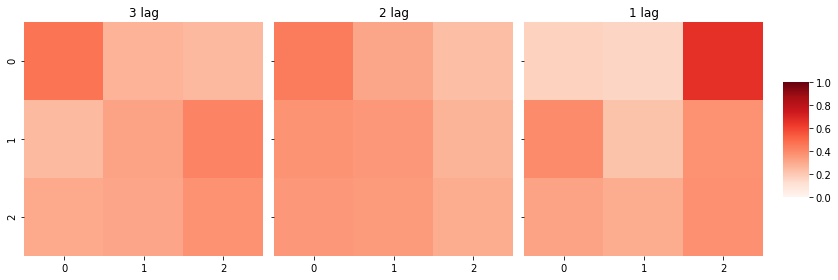

In [118]:
fig, axn = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))
cbar_ax = fig.add_axes([.91, .3, .03, .4])

for i, ax in enumerate(axn.flat):
    sns.heatmap(model.transition_matrices[i], ax=ax,
                cbar=i == 0,
                vmin=0, vmax=1,
                cmap='Reds',
                cbar_ax=None if i else cbar_ax)
    ax.set_title(f'{3-i} lag')

fig.tight_layout(rect=[0, 0, .9, 1]);

## Predict

In [45]:
model.predict(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([0, 2, 0])

In [46]:
model.predict_proba(pe.transform(np.array([['A>B>C'], ['B>B>A'], ['C>C>C']])))

array([[0.39856197, 0.32330497, 0.27813305],
       [0.31221481, 0.32581974, 0.36196545],
       [0.33610053, 0.33222156, 0.33167791]])